# Traffic Data Analysis in Hefei, China

In my hometown Hefei in east China, people often drive to work at highrises, which are located in a rather small-sized city with a really high population density. It is really different from people going to work in California – driving through freeway to much more spread-out company buildings. There will also be parents driving their kids to school. All these driving causes a ton of traffic, and the traffic condition change based on different resons – driving to work, picking up kids, weather, etc.

In this project, I had a Python script I wrote at the beginning of 2018 running on a server collecting real-time traffic information from four representative locations using AMaps API. (AMap is of the largest map providers in China, like Google Maps in the US). The four locations are:
- `Zhanqian Rd`  (Near train station, doesn't have much going-to-work traffic as compared to others)
- `Huizhou Ave (Dazhonglou)` (Close to city central, one of the busiest road)
- `Ningguo Rd`   (Close to city central, some restaurants nearby)
- `Xiyou Rd`  (Near a major highschool, big shopping malls nearby)

The API gives the following data:
- expedite % (vehicles move normally)
- congestion % (vehicles move slowly)
- block % (vehicles rarely move)
- unknown % (data unknown)

Those data are saved into a csv file for later analysis use, and also published to thingspeak for a direct visualization in real time (https://thingspeak.com/channels/399882)

In this jupyter notebook, the saved csv containing data from the beginning of the year to October is loaded using `pandas`, and after some manupulation, plotted with `seaborn`.

In [1]:
from processing.load_data import load_dataset, load_rain_data
from processing.plot import *
import matplotlib.pyplot as plt

# Matplotlib plotting setting
SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


zhanqian = load_dataset('zhanqian')
huizhou = load_dataset('zhonglou')
ningguo = load_dataset('ningguo')
xiyou = load_dataset('xiyou')

## Per 10 minute average congestion plot
First, we took the average for every 10 minute of the day and made a line plot. It is also important to `separate` weekday data and weekend data since there is no rushing hours to go to work during weekends.

Since `Zhanqian Rd` is an exception, being near the train station makes it much more affected by train schedule then work rush hours, we will discuss this exception later. 

The first obvious thing coming out of these plots are the rushing hour going to and off work from 7am-9am, and 5pm-7pm. For weekdays (blue) there is a clear peak on the other three locations. However on weekends (green), the morning working rush hours is clearly gone. People tend to "wake up" later at around 10am-12am and go out. There is a valley at around 12:30pm-1:30pm, possibly because people are having their noon nap.

As mentioned before, block means super heavy traffic, which cause vehicles to merely move. For the block ratio, we can also observe peaks on the work rushing hours in the morning and evening, however on weekends, these peaks are gone for the morning rushing hours. The evening peak is still there possibly because of people going out to eat. Another peak is around 10am-12am with possibly the same reason - people going to eat brunch / lunch. 

Comparing workdays and weekends, we can also observe that Xiyou Rd has a much higher traffic difference as compared to other places during weekends, possibly because of the big shopping malls nearby. Similarly, Ningguo Rd, having some restaurants nearby, has more traffic than Huizhou Ave over weekends.

For `Zhanqian Rd`, apart from the absense of rushing hours going on and off work, we can generally observe that at day time more congestion is there generally. Since it is close to the train station, it is expected there to be more train leaving and arriving during day time. There is a peak at 6pm for possibly dinner (since it's roughly the same for weekdays and nonweekdays) Interestingly, during weekdays there are less traffic than usual at 7:20am in the morning, however weekends looks normal. Possible reason is that people don't want to take the train during that time, since they don't want to hit the bad traffic on their way to train station.

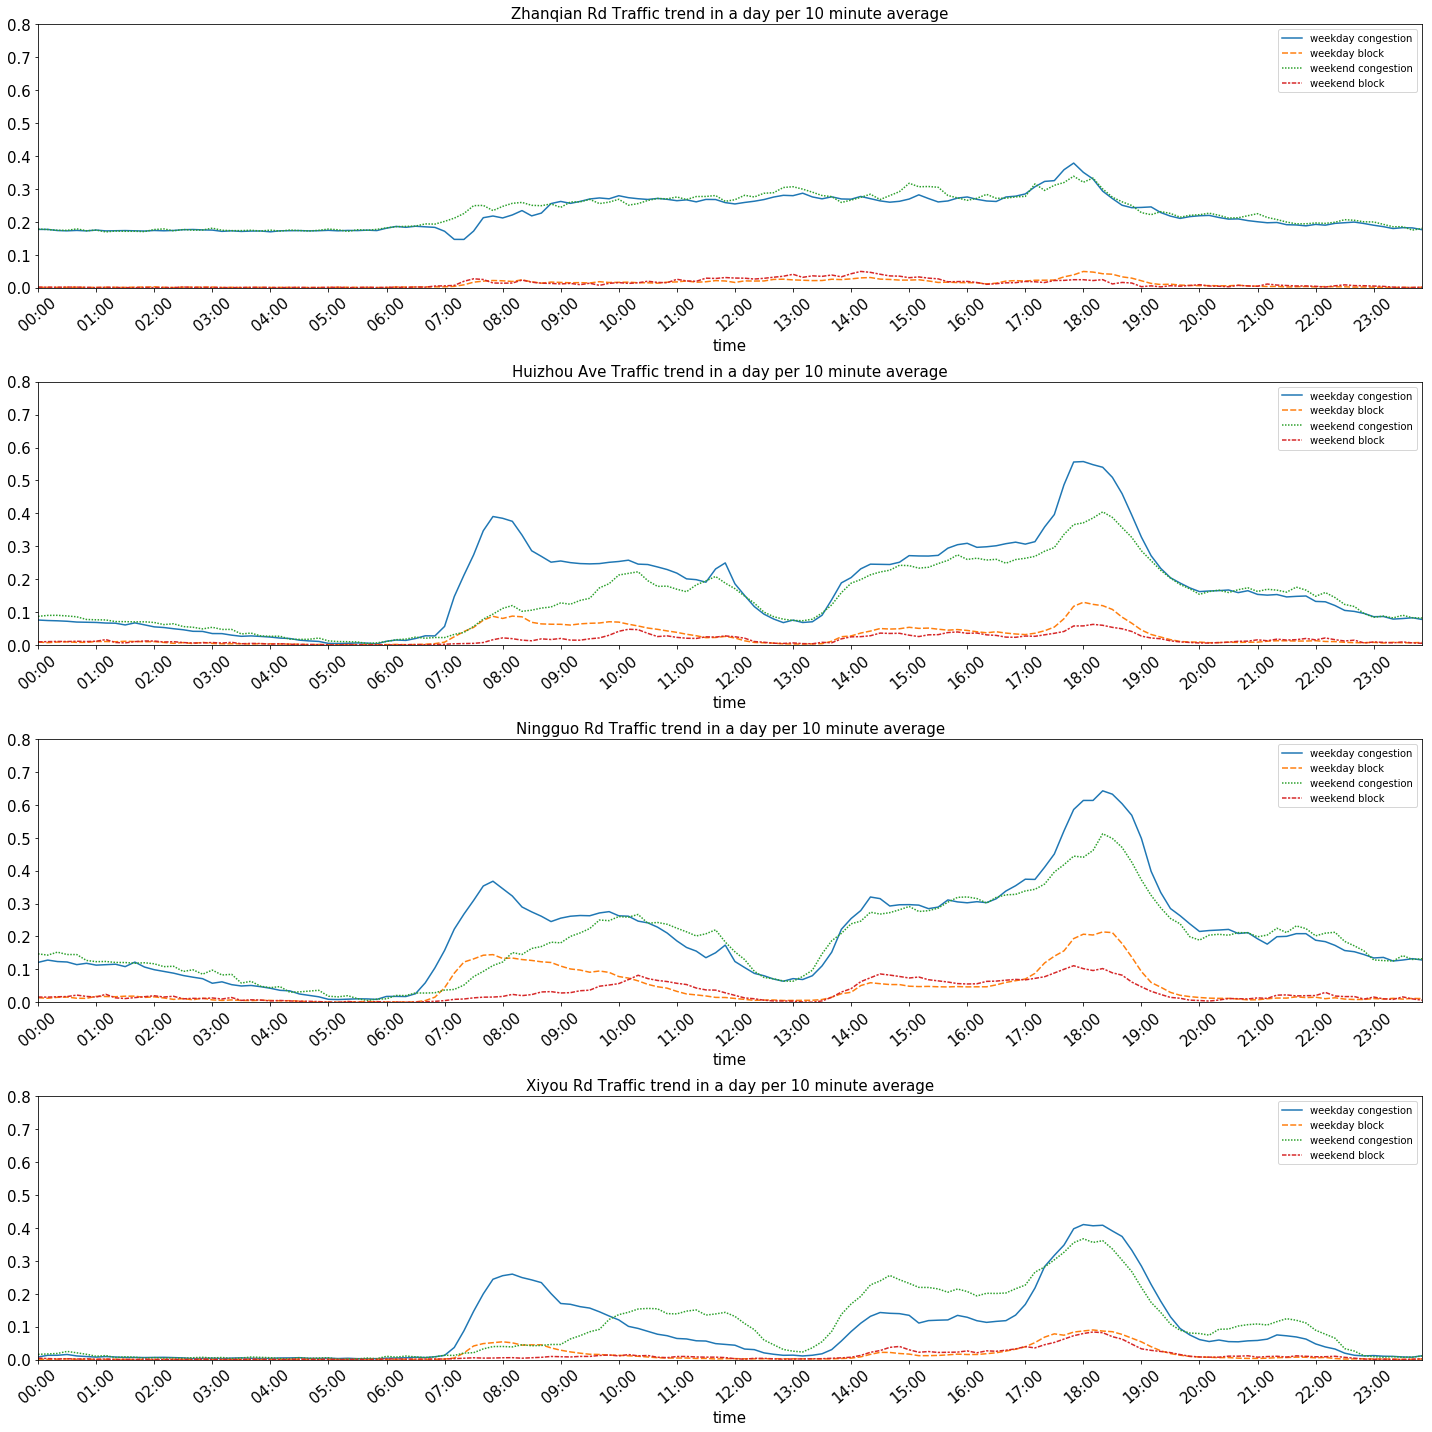

In [2]:
fig, ax = plt.subplots(4,1,figsize=(20, 20))
weekday_weekend_ten_min_plot(zhanqian, ax[0], 'Zhanqian Rd Traffic trend in a day per 10 minute average')
weekday_weekend_ten_min_plot(huizhou, ax[1], 'Huizhou Ave Traffic trend in a day per 10 minute average')
weekday_weekend_ten_min_plot(ningguo, ax[2], 'Ningguo Rd Traffic trend in a day per 10 minute average')
weekday_weekend_ten_min_plot(xiyou, ax[3], 'Xiyou Rd Traffic trend in a day per 10 minute average')
plt.tight_layout()

## Per hour Box plot
![Image of Box plot](https://chartio.com/images/tutorials/box-plot/boxplot1.png)
Although the last 4 plots gives good insights on the trand of traffic thoughout a day, it does not give good insights on the whole dataset beucause it is an average. In this box plot we are using the whole dataset we collected, thus can have more insights on the entire dataset.

First thing we oberse is that 5am is the most relax time on traffic, having 0 congestion for most of the time.

For 7am-9am, weekday's boxplots are shifted upward from weekends, meaning they are always more congested then weekends. Same thing happened to 5pm-6pm. (7pm doesn't have that big of a difference any more)

What's interesting is that over the weekends, 8pm-10pm there are more traffic in especially places near restaurants and shopping malls, for the reason discussed above (`Xiyou Rd`). The other way around, `Huizhou Ave`, one of the busiest road on people's way to work with less restaurants has much heavier traffic in 5-6pm on weekdays.

Another observation is that the shopping malls closes at around 11pm around `Xiyou Rd`, but most resuaurants / bars near `Ningguo Rd` opens all night. That could be why there is no traffic in `Xiyou Rd` after 11pm, but a fairly big congestion near `Ningguo Rd` around those times.

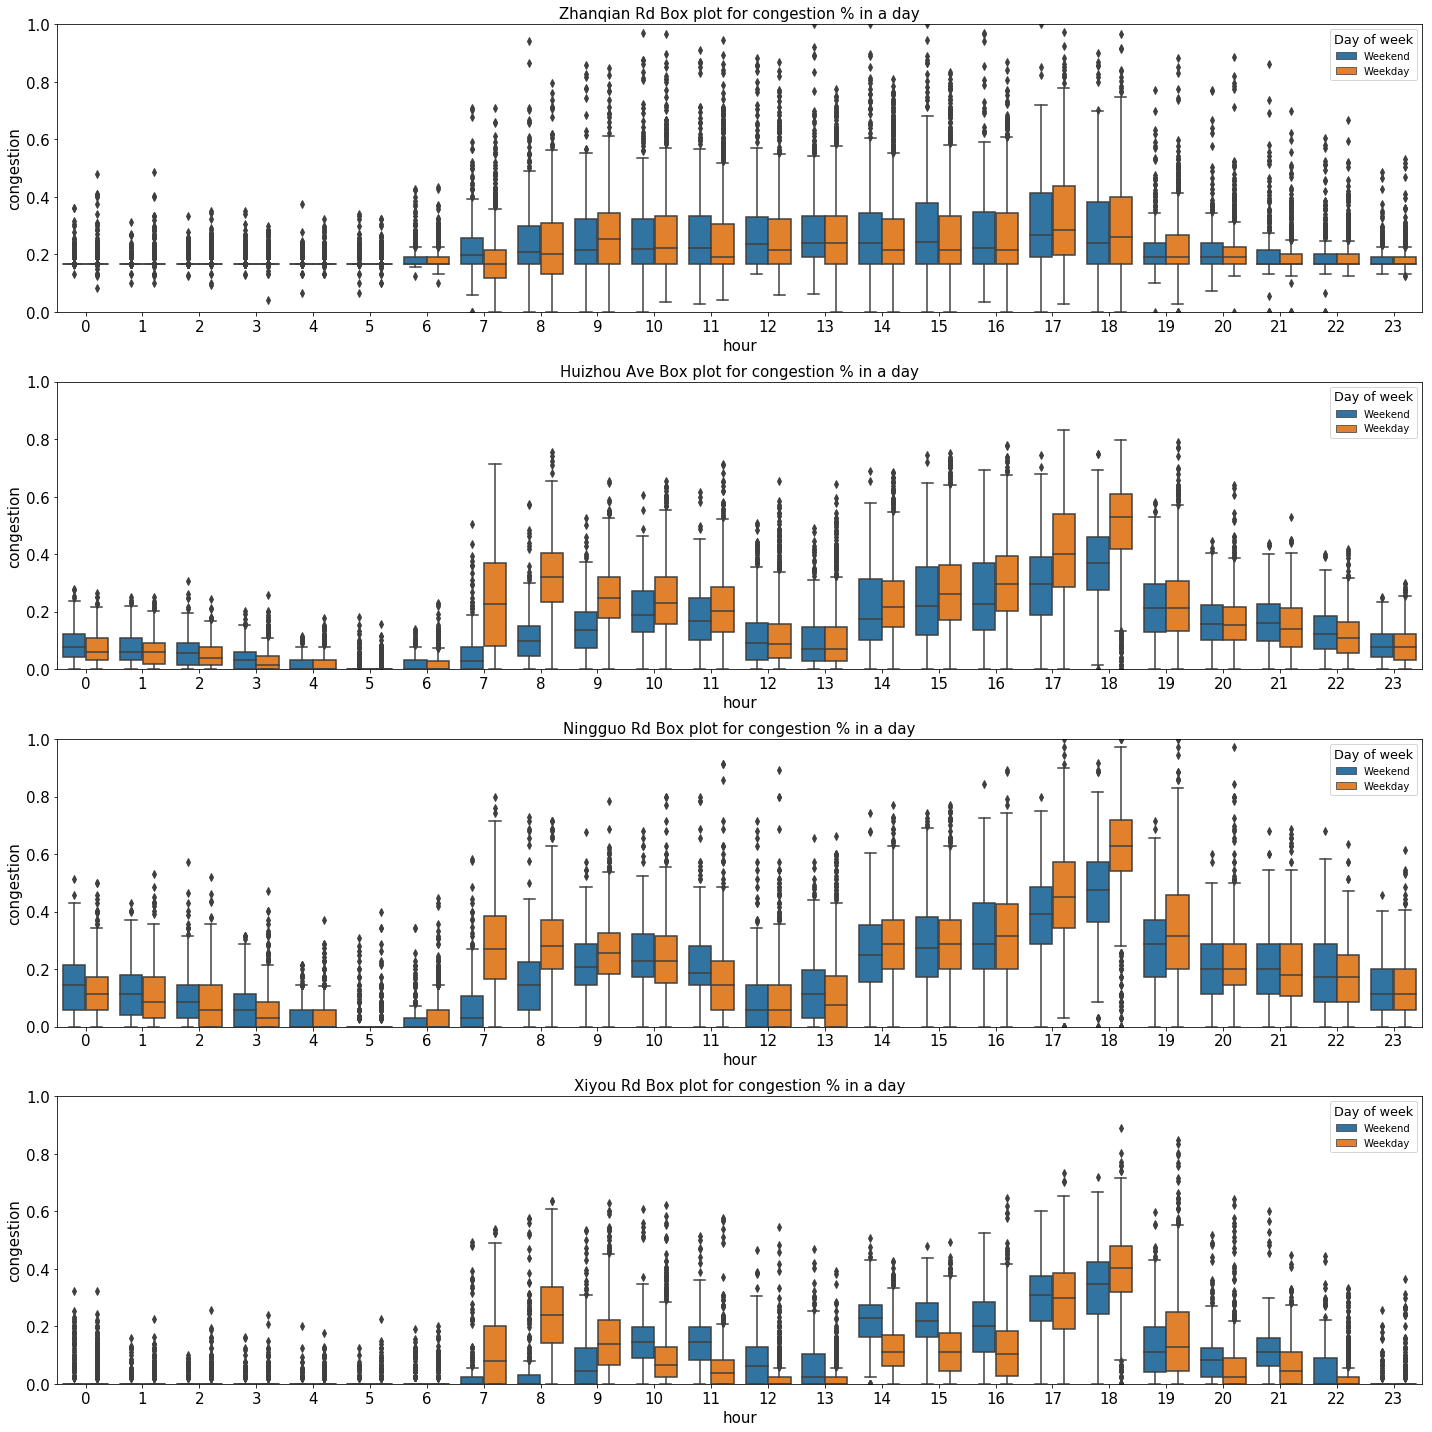

In [3]:
fig, axes = plt.subplots(4,1,figsize=(20,20))
hourly_boxplot(zhanqian, axes[0], 'Zhanqian Rd Box plot for congestion % in a day')
hourly_boxplot(huizhou, axes[1], 'Huizhou Ave Box plot for congestion % in a day')
hourly_boxplot(ningguo, axes[2], 'Ningguo Rd Box plot for congestion % in a day')
hourly_boxplot(xiyou, axes[3], 'Xiyou Rd Box plot for congestion % in a day')
plt.tight_layout()

## Violin plot for congestion % in a day
We've plotted the violin plot for the same data as above for a better visualization of the distribution.

From these distribution, the biggest thing we can gain is that in the morning, weekdays has a much more spread of congestion (standard deviation) in the morning, as compared to weekends. This might due to different days of week has different congestion condition in the morning.

For midnights, weekdays the congestion clusters more towards to 0, as compared to weekends. People tend to go out more on weekends instead of weekdays apparently.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

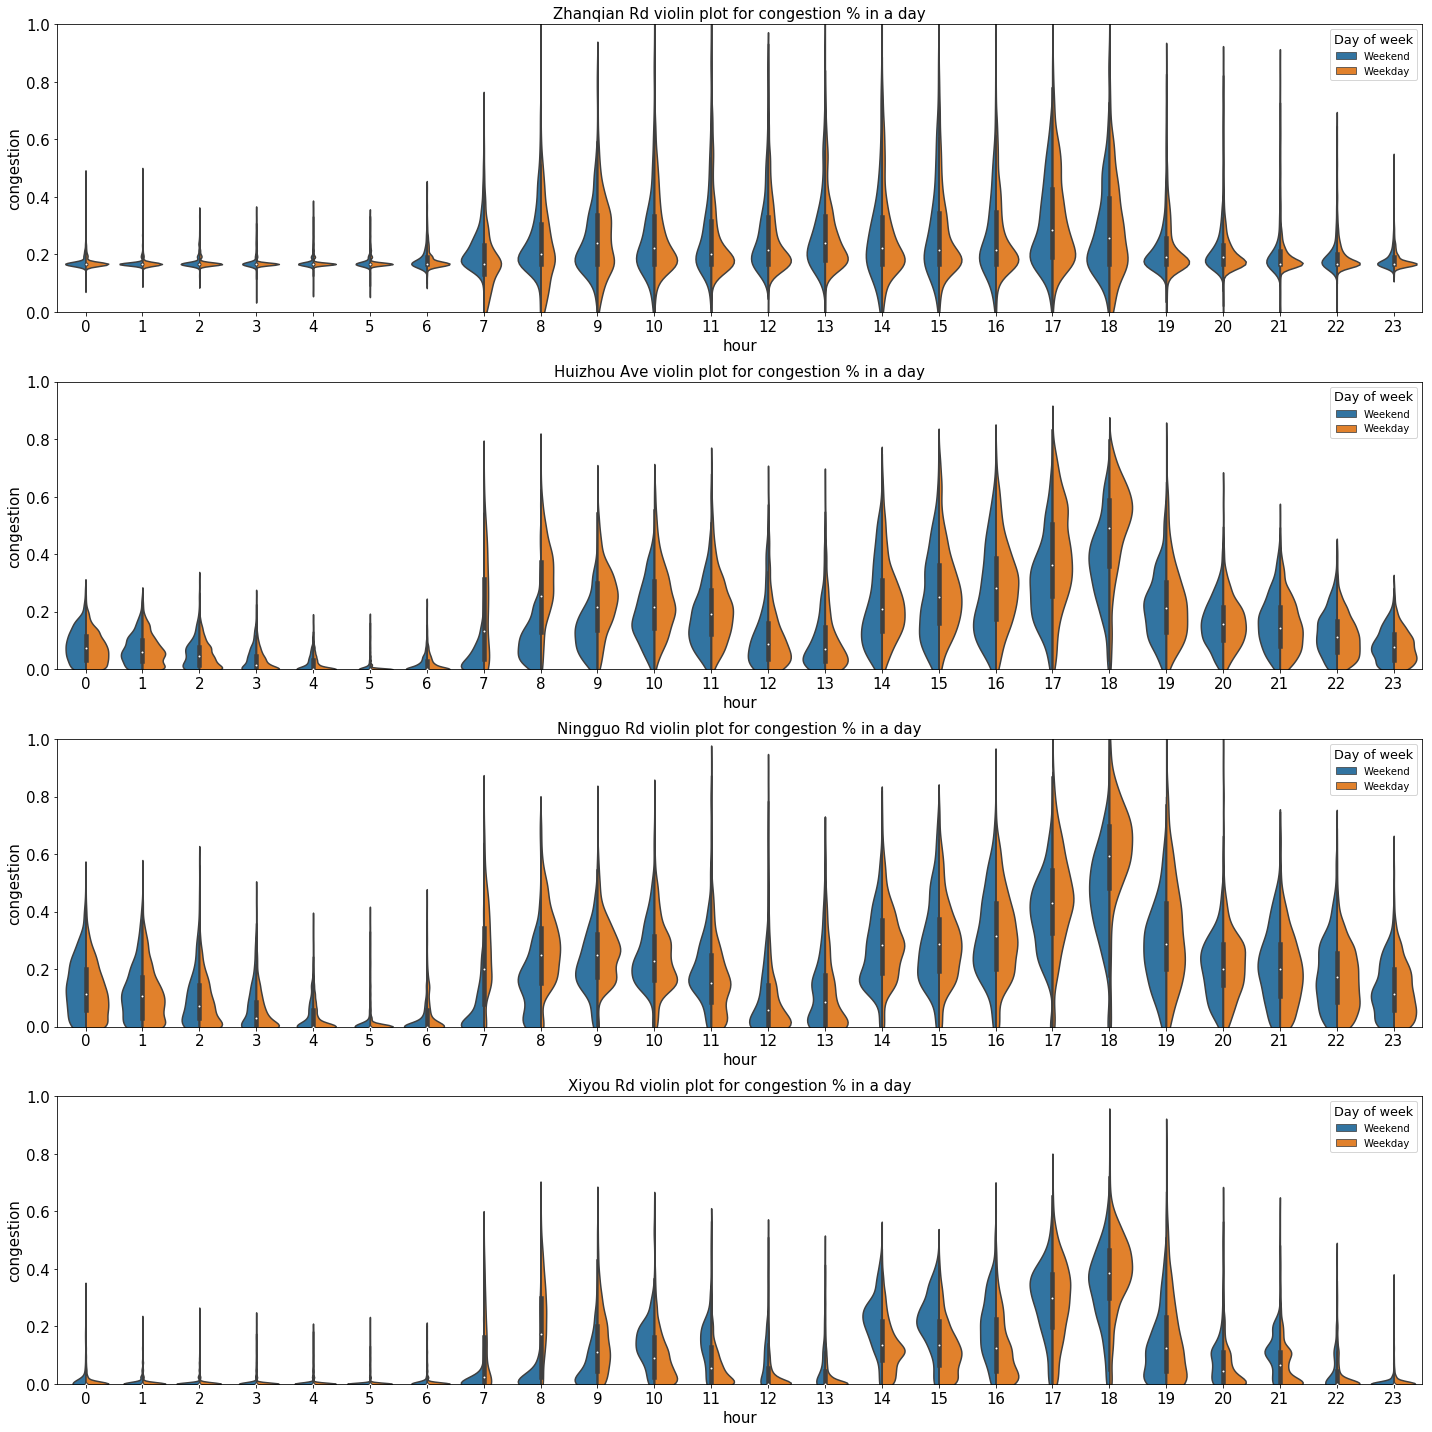

In [4]:
fig, axes = plt.subplots(4,1,figsize=(20,20))
hourly_violinplot(zhanqian, axes[0], 'Zhanqian Rd violin plot for congestion % in a day')
hourly_violinplot(huizhou, axes[1], 'Huizhou Ave violin plot for congestion % in a day')
hourly_violinplot(ningguo, axes[2], 'Ningguo Rd violin plot for congestion % in a day')
hourly_violinplot(xiyou, axes[3], 'Xiyou Rd violin plot for congestion % in a day')
plt.tight_layout()

# Connect Traffic with Weather
We obtained per hour rainfall amount (mm) data from Anhui Meteorological Bureau on stations near our 4 parts of the city. We will now try to find some relationship between the rain and traffic congestion.

The rainfall is measured in mm(millimeter) for every pass hour. We will classify them into 6:
- `0`: 0mm No rain
- `1`: 0.1-1mm Light Rain
- `2`: 1-5mm Heavy Rain
- `3`: 5-10mm Super Heavy Rain
- `4`: 10-20mm Flash Flood
- `5`: 20mm+ Super Flash Flood



In [5]:
zhanqian_rain = load_rain_data(2)
huizhou_rain = load_rain_data(3)
ningguo_rain = load_rain_data(4)
xiyou_rain = load_rain_data(5)

## Rainfall data overview
As we made a statistical count of the rainfall data, we find out there isn't that much recorded points of heavy rains in Hefei. Thus we might have trouble getting a solid conclusion on the cause of the rain.

In [6]:
rain_data_summary({'Zhanqian Rd': zhanqian_rain, 'Huizhou Ave': huizhou_rain,
                  'Ningguo Rd': ningguo_rain, 'Xiyou Rd': xiyou_rain})

Zhanqian Rd
0: 6870	1: 660	2: 164	3: 37	4: 12	5: 6	
Huizhou Ave
0: 6895	1: 582	2: 209	3: 30	4: 12	5: 7	
Ningguo Rd
0: 6189	1: 569	2: 145	3: 24	4: 11	5: 11	
Xiyou Rd
0: 7341	1: 244	2: 95	3: 18	4: 15	5: 5	


## Boxplot of impact to congestion by rain levels
As we see from the summary above, the incidence of heavy rain are relatively small to non rain, so we encountered difficulty to find a string correlation. There are many other reasons why there is a different amount of traffic for rainy days, including less people would like to go out during rainy days. All these different causes make it difficult to make a solid concludion.

However, some insights can still be inferred from the following plots. For rushing hours off work (5-7pm), it shows that the rain amount has a stronger relationship to traffic. A light and heavy rain generally makes more congestion. This could because that people already drive to work has to drive back, making them no choice on whether go out or not. They tend to drive slowly if the weather is bad, making more congestion.

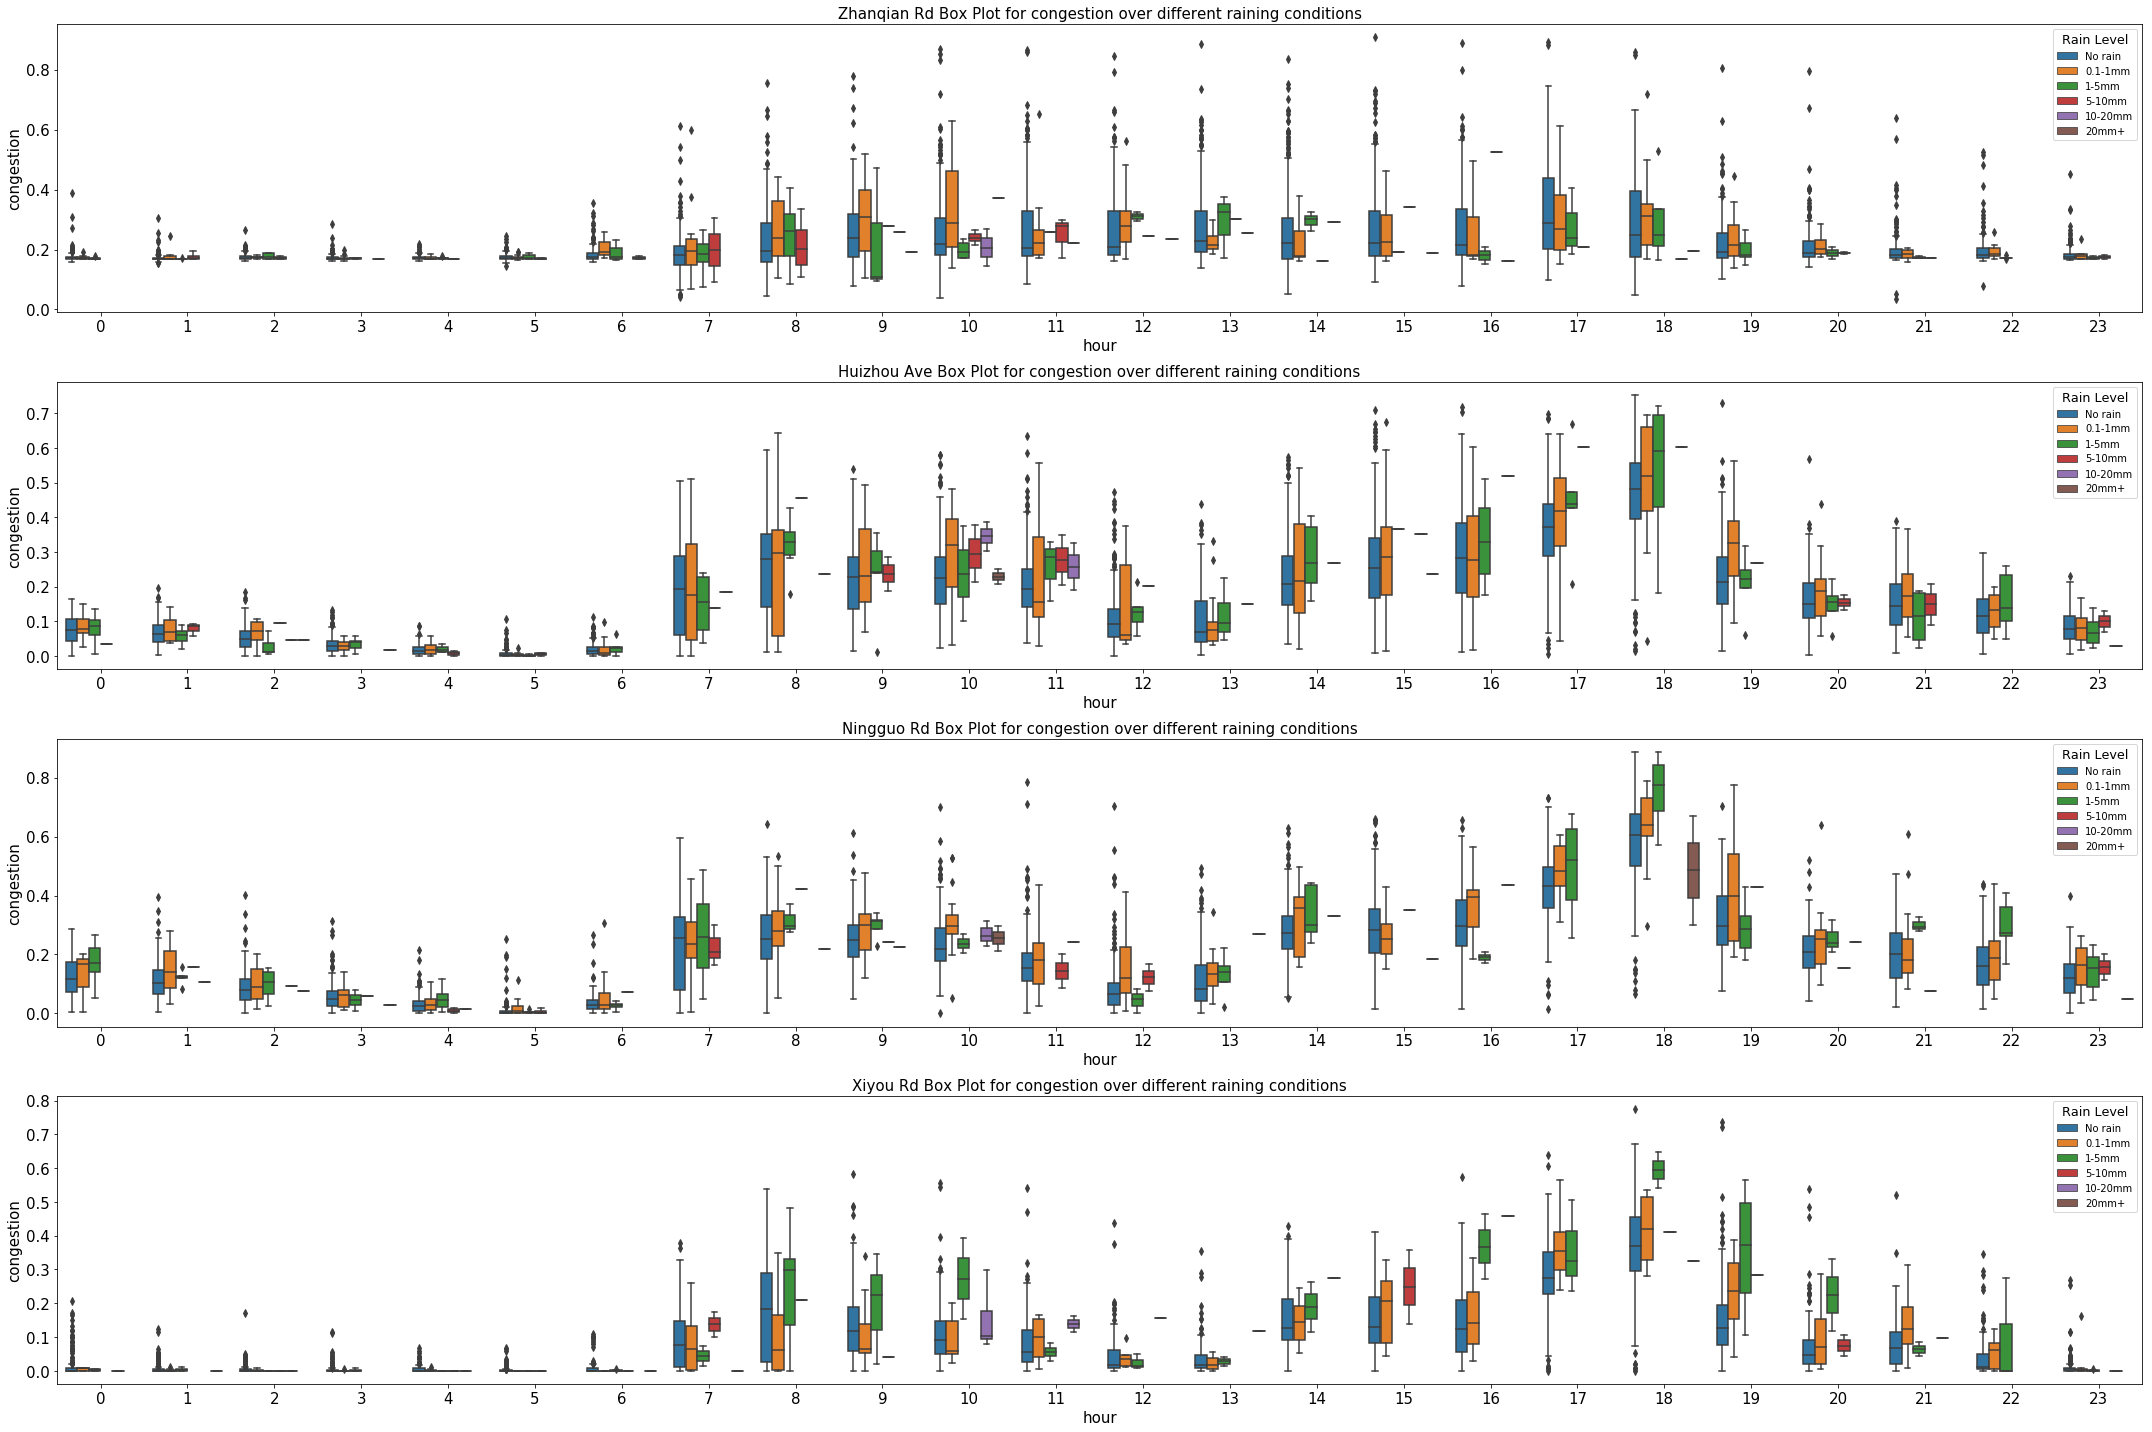

In [7]:
fig, ax = plt.subplots(4,1,figsize=(30,20))
zhanqian_combined = process_rain_data(zhanqian, zhanqian_rain)
huizhou_combined = process_rain_data(huizhou, huizhou_rain)
ningguo_combined = process_rain_data(ningguo, ningguo_rain)
xiyou_combined = process_rain_data(xiyou, xiyou_rain)
rain_level_boxplot(zhanqian_combined, ax[0], 'Zhanqian Rd Box Plot for congestion over different raining conditions')
rain_level_boxplot(huizhou_combined, ax[1], 'Huizhou Ave Box Plot for congestion over different raining conditions')
rain_level_boxplot(ningguo_combined, ax[2], 'Ningguo Rd Box Plot for congestion over different raining conditions')
rain_level_boxplot(xiyou_combined, ax[3], 'Xiyou Rd Box Plot for congestion over different raining conditions')
plt.tight_layout()

In [8]:
zhanqian_rain_effect = process_rain(zhanqian, zhanqian_combined)
huizhou_rain_effect = process_rain(huizhou, huizhou_combined)
ningguo_rain_effect = process_rain(ningguo, ningguo_combined)
xiyou_rain_effect = process_rain(xiyou, xiyou_combined)

## Congestion difference from hourly average in different raining conditinon
As our further attempt to find more relationship between raining condition and traffic congestion, we calculated every sample's congestion difference to hourly average congestion, plotted the following scatter plot against how heavy it rains.

Since there are a lot of data spread out randonmly when raining between 0.1-1mm (light rain), we assumed such rain level doesn't affect traffic much, so we dropped those points from the plot. We are only plotting data when raining 1+ mm in the past hour. What we see from the plot is a general more congestion (difference is positive) for rain range around 5-20mm in the past hour. There are apparently more points at a higher positive difference in such rain range.

For rain less than 5mm in the past hour, the points are still distributed randomly, which doesn't give us more useful information.

For more heavy rains 20+ mm, although there are much less samples for us, we can see most of them are below the line (negative difference). This means it's actually less congested for flash flood hours. This could because people are unwilling to go out for such big rains, significantly decreased number of cars running on the road.

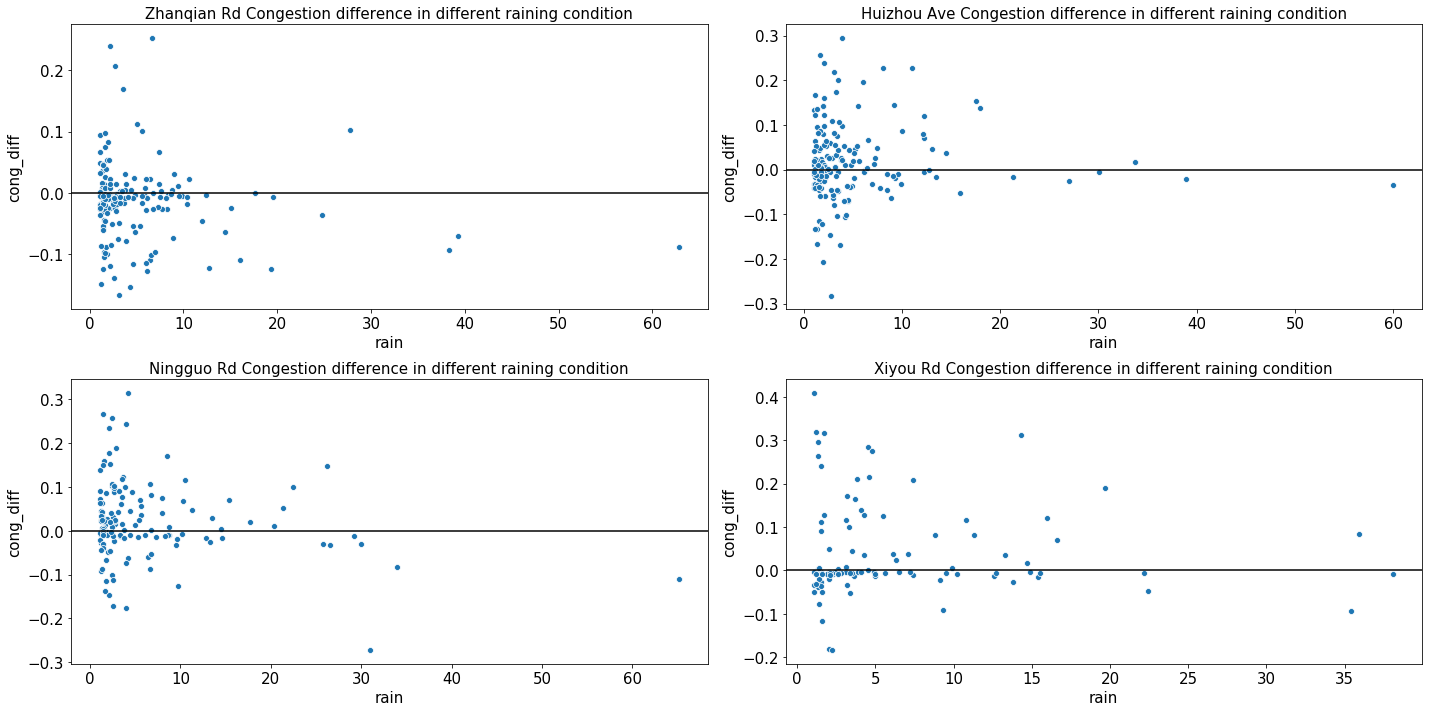

In [9]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
cong_diff_scatter_plot(zhanqian_rain_effect, axes[0,0], 'Zhanqian Rd Congestion difference in different raining condition')
cong_diff_scatter_plot(huizhou_rain_effect, axes[0,1], 'Huizhou Ave Congestion difference in different raining condition')
cong_diff_scatter_plot(ningguo_rain_effect, axes[1,0], 'Ningguo Rd Congestion difference in different raining condition')
cong_diff_scatter_plot(xiyou_rain_effect, axes[1,1], 'Xiyou Rd Congestion difference in different raining condition')
plt.tight_layout()

# Future Steps
We made a lot of insightful plots that we can make a good amount of insights. Since the limited in time for this project, some of them are not discussed thoroghly. Some future plans in improving this analysis includes:
- Try other matiematical calculations to fit the rain better to traffic congestion
- Try other kind of plots for a better data / relation visualization
- Collect traffic information in a city with much more rain incidents
- Improve the data collection script so that the data is more consistent
...